In [26]:
from rdkit import Chem
from rdkit.Chem import AllChem, rdDistGeom
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_3d = True
import py3Dmol
import tabs
import copy

In [24]:
def drawit(ms, p=None, confIds=None, removeHs=False,colors=('cyanCarbon','blueCarbon','redCarbon')):
        if confIds is None:
            confIds = [-1]*len(ms)
        if p is None:
            p = py3Dmol.view(width=400, height=400)
        p.removeAllModels()
        for i,(m,confId) in enumerate(zip(ms,confIds)):
            if removeHs:
                m = Chem.RemoveHs(m)
            IPythonConsole.addMolToView(m,p,confId=confId)
        for i,m in enumerate(ms):
            p.setStyle({'model':i,},
                            {'stick':{'colorscheme':colors[i%len(colors)]}})
        p.zoomTo()
        return p.show()

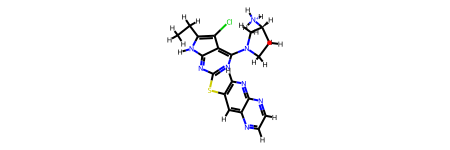

In [35]:
ref = Chem.MolFromMolFile("../Data/TABS/Input/1A0_4HXW.sdf",removeHs=False)
ref

In [47]:
mol = copy.deepcopy(ref)
mol.RemoveAllConformers()

In [48]:
drawit([mol])

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [49]:
ps = rdDistGeom.srETKDGv3()
ps.randomSeed = 0x1eaf
ps.numThreads = 8
rdDistGeom.EmbedMultipleConfs(mol,1,ps)

In [50]:
mol.GetNumConformers()

1

In [51]:
from rdkit.Chem import rdShapeAlign

In [41]:
? rdShapeAlign.AlignMol

Docstring:
AlignMol( (Mol)ref, (Mol)probe [, (int)refConfId=-1 [, (int)probeConfId=-1 [, (bool)useColors=True [, (float)opt_param=0.5 [, (int)max_preiters=3 [, (int)max_postiters=16]]]]]]) -> tuple :
    aligns probe to ref, probe is modified

    C++ signature :
        boost::python::tuple AlignMol(RDKit::ROMol,RDKit::ROMol {lvalue} [,int=-1 [,int=-1 [,bool=True [,double=0.5 [,unsigned int=3 [,unsigned int=16]]]]]])

AlignMol( (ShapeInput)refShape, (Mol)probe [, (int)probeConfId=-1 [, (bool)useColors=True [, (float)opt_param=0.5 [, (int)max_preiters=3 [, (int)max_postiters=16]]]]]) -> tuple :
    aligns probe to reference shape, probe is modified

    C++ signature :
        boost::python::tuple AlignMol(ShapeInput,RDKit::ROMol {lvalue} [,int=-1 [,bool=True [,double=0.5 [,unsigned int=3 [,unsigned int=16]]]]])
Type:      function

In [52]:
tpl = rdShapeAlign.AlignMol(ref, mol, 0, 0)
print(tpl)

(0.5697614210222072, 0.15866018568947457)


In [53]:
drawit([ref, mol])

3Dmol.js failed to load for some reason. Please check your browser console for error messages.